# Computational Methods for Physicists Final Project
## Title: Asteroid Motion Tracking
### Duration: 14 Days (Start Date: Tuesday, April 29, 2025, Due Date: During finals week)

---

## 1. Introduction

This is your final project for this class!

In this project, you will analyze the motion of an asteroid captured in a sequence of astronomical images taken over several nights. The objective is to track the asteroid's position relative to background stars, calculate its apparent speed, and model its trajectory.

You will work with a sequence of FITS images that show both stars and a moving asteroid. The challenge is to identify the asteroid in each frame, extract its coordinates, and analyze how it moves across the sky. By measuring its displacement over time, you will estimate the asteroid's velocity in arcseconds per hour and discuss how astronomers predict asteroid paths.

**Project Topic:** Tracking asteroid motion using time-series astronomical data.

**Key Focus:** Object detection, coordinate measurement, motion analysis.

## 2. Learning Objectives

By completing this project, you will:
- Learn to work with time-series astronomical FITS data.
- Apply computational methods to detect and measure moving objects.
- Interpret motion data to estimate speeds and predict trajectories.
- Document your process clearly in a reproducible way.

## 3. Dataset Description

**You will receive:**
- A series of FITS images captured during one night.
- Each image contains stars and a moving asteroid.

The FITS images include:
- Time information indicating when each image was taken.
- Location information about the observing site.

You will use this metadata to analyze the motion of the asteroid across the sky during the observation period.

## 4. Project Tasks (Total: 28 Points)

### Task 1: Data Exploration and Visualization (6 points)

- Load all FITS images and inspect their contents.
- Display several images to visually confirm the presence and motion of the asteroid.
- Highlight the asteroid in each displayed image by marking it with a circle.
- Generate a final composite image by overlaying all frames to show the asteroid's path as it moves across the sky.

# Installing Required Libraries

In [249]:

# Install required libraries
!pip install astropy matplotlib numpy photutils auto-stretch astroquery ipytest pytest


In [250]:
#---------Basic Imports-----------#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import requests
from io import BytesIO
from tqdm import tqdm
from random import randint
#---------Astropy Imports-----------#
import astroquery
from astropy.wcs import WCS
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
from astropy.stats import mad_std
import photutils
from photutils.detection import DAOStarFinder
import auto_stretch
from auto_stretch import apply_stretch



# Loading Fits Files

Processing: Stacked_5_73 Leonis_10.0s_IRCUT_20250427-221237.fit
Processing: Stacked_10_73 Leonis_10.0s_IRCUT_20250427-223915.fit
Processing: Stacked_92_73 Leonis_10.0s_IRCUT_20250427-234644.fit
Processing: Stacked_30_73 Leonis_10.0s_IRCUT_20250428-020001.fit
Processing: Stacked_156_73 Leonis_10.0s_IRCUT_20250428-234001.fit
Processing: Stacked_91_73 Leonis_10.0s_IRCUT_20250429-020001.fit


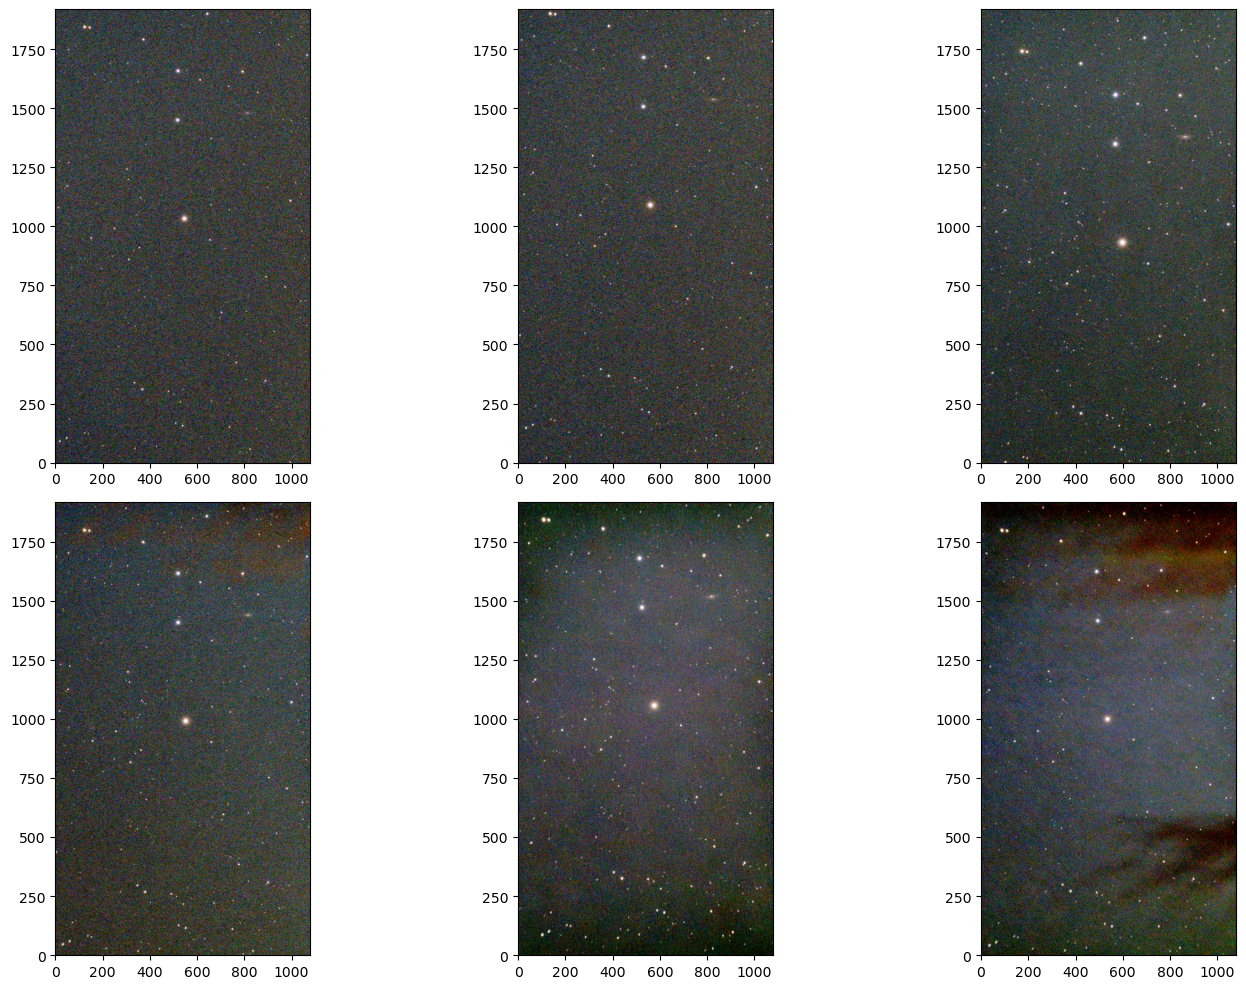

In [251]:
# Base URL of the GitHub folder containing the FITS files
base_url = "https://github.com/DDarrigo-Brick/PHY386/raw/refs/heads/main/2025/Final/DDarrigo-Brick/Flora/Data/"

# List of FITS files
fits_files = [
    "Stacked_5_73 Leonis_10.0s_IRCUT_20250427-221237.fit",
    "Stacked_10_73 Leonis_10.0s_IRCUT_20250427-223915.fit",
    "Stacked_92_73 Leonis_10.0s_IRCUT_20250427-234644.fit",
    "Stacked_30_73 Leonis_10.0s_IRCUT_20250428-020001.fit",
    "Stacked_156_73 Leonis_10.0s_IRCUT_20250428-234001.fit",
    "Stacked_91_73 Leonis_10.0s_IRCUT_20250429-020001.fit"
]
# # Loop through each FITS file and process the images
# for fits_file in fits_files:
#     fits_url = base_url + fits_file
#     print(f"Processing: {fits_file}")

#     try:
        
#         # # Display the image
#         # fig = plt.figure()
#         # plt.imshow(apply_stretch(star_data))

#     except Exception as e:
#         print(f"Error processing {fits_file}: {e}")


# Create a figure with subplots for all six FITS images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each FITS file and plot on the corresponding subplot
for i, fits_file in enumerate(fits_files):
    fits_url = base_url + fits_file
    print(f"Processing: {fits_file}")

    try:
        # Fetch the FITS file
        response = requests.get(fits_url)
        response.raise_for_status()

       # Load the FITS file into an HDUList using BytesIO
        hdul = fits.open(BytesIO(response.content))

        # Assume the first extension contains an RGB image in (3, Height, Width) format
        star_data = np.transpose(hdul[0].data, (1, 2, 0))  # Shape should be (3, Height, Width)
        hdul.close() #

        # Plot the image on the corresponding subplot
        ax = axes[i]
        ax.imshow(apply_stretch(star_data), origin='lower')
        
    except Exception as e:
        print(f"Error processing {fits_file}: {e}")
        axes[i].set_title("Error")
        axes[i].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

# Identifying Asteroid Based on Movement

Processing: Stacked_5_73 Leonis_10.0s_IRCUT_20250427-221237.fit
Processing: Stacked_10_73 Leonis_10.0s_IRCUT_20250427-223915.fit
Object with most motion in Stacked_10_73 Leonis_10.0s_IRCUT_20250427-223915.fit: Motion = 2.439289065241079


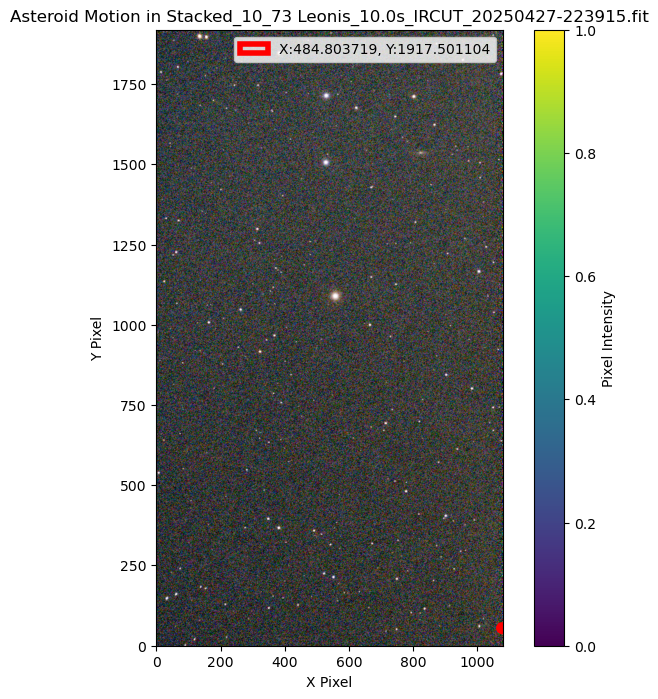

Processing: Stacked_92_73 Leonis_10.0s_IRCUT_20250427-234644.fit
Object with most motion in Stacked_92_73 Leonis_10.0s_IRCUT_20250427-234644.fit: Motion = 2.5766977007136282


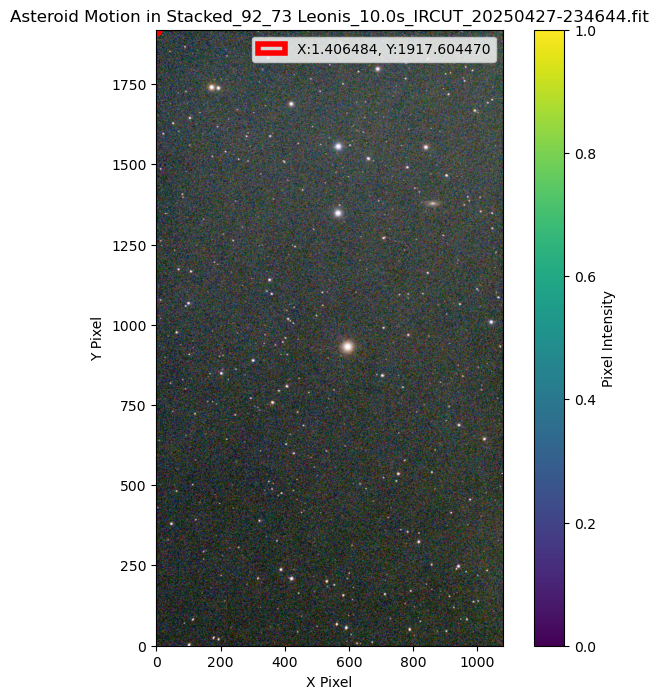

Processing: Stacked_30_73 Leonis_10.0s_IRCUT_20250428-020001.fit
Object with most motion in Stacked_30_73 Leonis_10.0s_IRCUT_20250428-020001.fit: Motion = 2.442491109637853


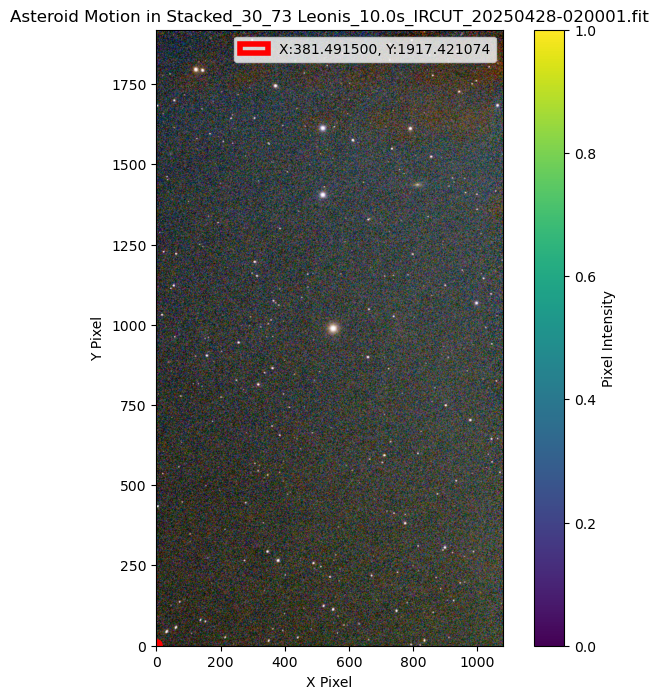

Processing: Stacked_156_73 Leonis_10.0s_IRCUT_20250428-234001.fit
Object with most motion in Stacked_156_73 Leonis_10.0s_IRCUT_20250428-234001.fit: Motion = 2.3800761080956057


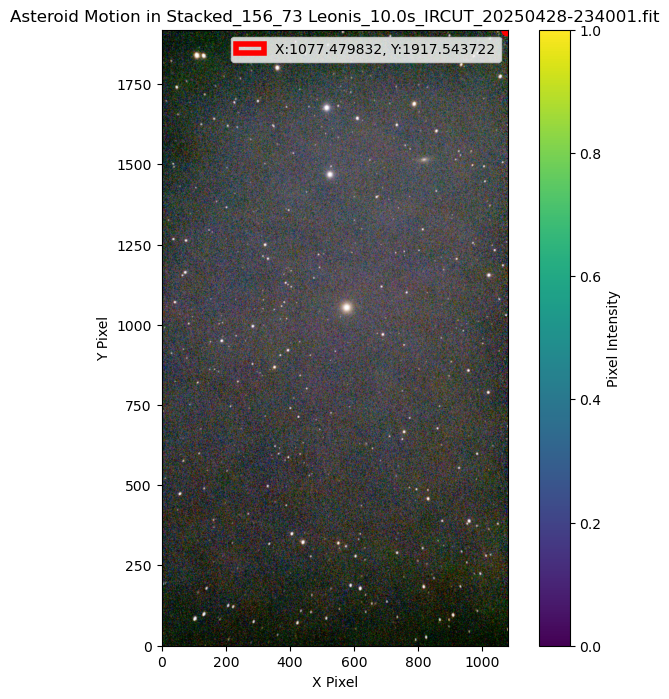

Processing: Stacked_91_73 Leonis_10.0s_IRCUT_20250429-020001.fit
Object with most motion in Stacked_91_73 Leonis_10.0s_IRCUT_20250429-020001.fit: Motion = 2.371148905416663


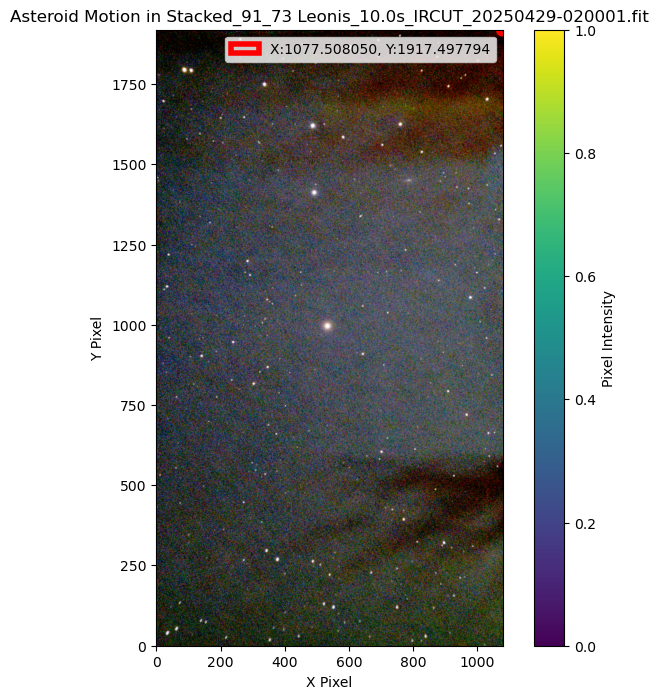

In [257]:
# Function to calculate angular distance between two WCS coordinates
def angular_distance(ra1, dec1, ra2, dec2):
    """Calculate the angular distance between two WCS coordinates."""
    return np.sqrt((ra1 - ra2)**2 + (dec1 - dec2)**2)

# Threshold for detecting significant motion (in degrees)
motion_threshold = 2.125  # Adjust as needed

# Placeholder for previous frame's sources and WCS
previous_sources = None
previous_wcs = None


# Loop through each FITS file
for i, fits_file in enumerate(fits_files):
    fits_url = base_url + fits_file
    print(f"Processing: {fits_file}")

    # Fetch the FITS file
    response = requests.get(fits_url)
    response.raise_for_status()

    # Load the FITS file into an HDUList using BytesIO
    hdul = fits.open(BytesIO(response.content))

    # Assume the first extension contains an RGB image in (3, Height, Width) format
    star_data = np.transpose(hdul[0].data, (1, 2, 0))  # Shape should be (3, Height, Width)
    header = hdul[0].header
    hdul.close()  # Close the FITS file

    # Initialize WCS with the FITS header
    wcs = WCS(header, naxis=2)

    # Detect sources in the current image
    bkg_sigma = mad_std(star_data[:, :, 0])  # Use the first channel for source detection
    daofind = DAOStarFinder(fwhm=3.0, threshold=5. * bkg_sigma, min_separation=2.0)
    sources = daofind(star_data[:, :, 0])  # Use the first channel for source detection

    # If this is the first image, just store the sources and WCS
    if previous_sources is None:
        previous_sources = sources
        previous_wcs = wcs
        continue

    # Compare sources between the current and previous images
    max_motion = 0
    moving_object = None

    for source in sources:
        x, y = source['xcentroid'], source['ycentroid']
        ra, dec = wcs.all_pix2world(x, y, 1)

        for prev_source in previous_sources:
            prev_x, prev_y = prev_source['xcentroid'], prev_source['ycentroid']
            prev_ra, prev_dec = previous_wcs.all_pix2world(prev_x, prev_y, 1)

            # Calculate angular distance
            motion = angular_distance(ra, dec, prev_ra, prev_dec)

            # Check if this motion is the largest so far
            if motion > max_motion and motion > motion_threshold:
                max_motion = motion
                moving_object = (x, y)  # Store pixel coordinates for plotting
    # Plot the image individually
    plt.figure(figsize=(8, 8))
    plt.imshow(apply_stretch(star_data), origin='lower')
    plt.title(f"Asteroid Motion in {fits_file}")

    if moving_object:
        print(f"Object with most motion in {fits_file}: Motion = {max_motion}")
        # Add a red circle around the moving object
        circle = plt.Circle(moving_object, radius=10, edgecolor='red', facecolor='none', lw=4)
        plt.gca().add_patch(circle)
        plt.legend([circle], [f"X:{x:.6f}, Y:{y:.6f}"], loc='upper right')
    else:
        print(f"No significant motion detected in {fits_file}.")
        plt.title("No Motion Detected")

    plt.xlabel("X Pixel")
    plt.ylabel("Y Pixel")
    plt.colorbar(label="Pixel Intensity")
    plt.show()

    # Update previous sources and WCS
    previous_sources = sources
    previous_wcs = wcs

### Task 2: Physical Context and Research (3 points)

- Explain what asteroids are and why tracking their motion is scientifically important.
- Describe how measuring an asteroid’s motion across the sky allows astronomers to estimate its orbit.
- Discuss how short-term observations like this one can be used to predict future positions of near-Earth objects.

#### Response

Asteroids are large clusters of rock that originate from the early days of the solar system, they follow predictable paths through space as they are influenced by the gravitational pull of nearby celestial bodies; these paths can be modeled using Kepler's Laws of planetary motion. Tracking their movement allows us to map out the space around them and image objects we may be unable to see with our telescopes.

 Using the asteroid's position at various times, we can create an approximate trajectory the asteroid takes. We can then evolve that trajectory through time by applying Kepler's laws to predict the asteroid's position at a later time with sufficient accuracy; the more data points gathered, the better the result. 

### Task 3: Data Processing and Feature Extraction (13 points)

- Pre-process the images to enhance the visibility of the asteroid (e.g., adjust contrast or apply simple filtering techniques).
- If necessary, align the images using background stars so that the asteroid's motion can be accurately tracked.
- Extract the asteroid’s position in each frame in WCS (World Coordinate System) coordinates using the FITS metadata.
- Plot the asteroid’s motion over time in a 2D plot (e.g., RA vs Dec or X vs Y), separate from the image overlays in Task 1.
- Create an additional figure that shows the displacement of the asteroid as a function of time (e.g., plot angular distance vs time).

Processing: Stacked_5_73 Leonis_10.0s_IRCUT_20250427-221237.fit
Processing: Stacked_10_73 Leonis_10.0s_IRCUT_20250427-223915.fit
Processing: Stacked_92_73 Leonis_10.0s_IRCUT_20250427-234644.fit
Processing: Stacked_30_73 Leonis_10.0s_IRCUT_20250428-020001.fit
Processing: Stacked_156_73 Leonis_10.0s_IRCUT_20250428-234001.fit
Processing: Stacked_91_73 Leonis_10.0s_IRCUT_20250429-020001.fit


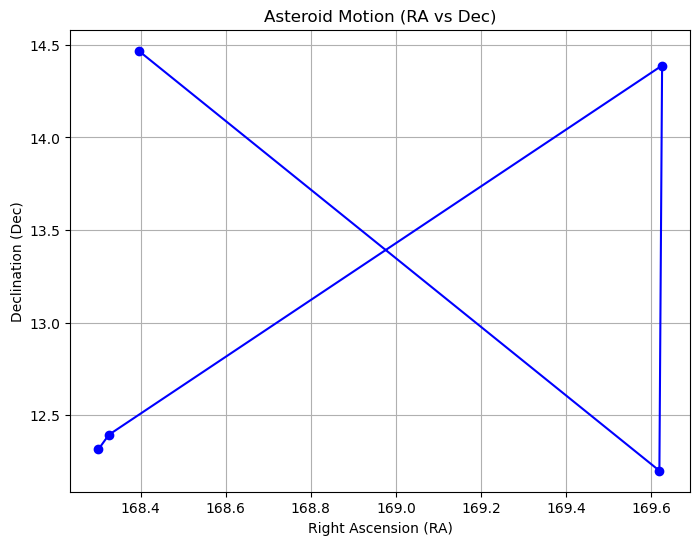

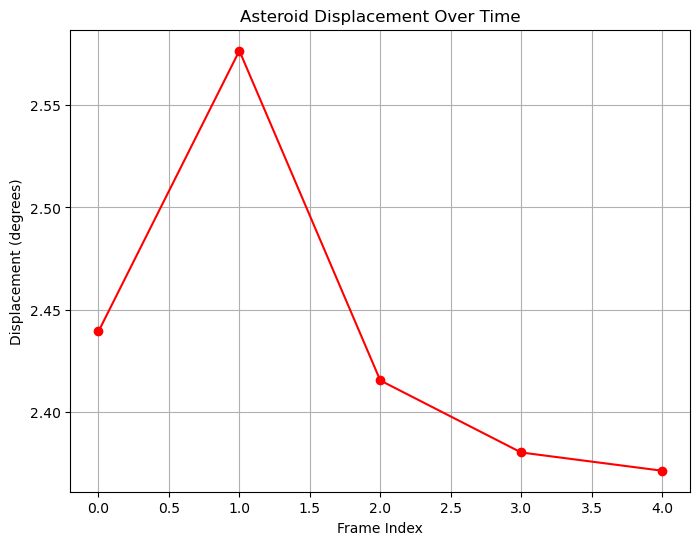

In [ ]:

# Placeholder for previous frame's sources, WCS, and time
previous_sources = None
previous_wcs = None
previous_time = None

# Lists to store asteroid positions and displacements
ra_list = []
dec_list = []
time_list = []
displacement_list = []

# Loop through each FITS file
for fits_file in fits_files:
    fits_url = base_url + fits_file
    print(f"Processing: {fits_file}")

    # Fetch the FITS file
    response = requests.get(fits_url)
    response.raise_for_status()

    # Load the FITS file into an HDUList using BytesIO
    hdul = fits.open(BytesIO(response.content))

    # Assume the first extension contains an RGB image in (3, Height, Width) format
    star_data = np.transpose(hdul[0].data, (1, 2, 0))  # Shape should be (3, Height, Width)
    header = hdul[0].header
    hdul.close()  # Close the FITS file

    # Initialize WCS with the FITS header
    wcs = WCS(header, naxis=2)

    # Extract observation time from the FITS header
    observation_time = header.get('DATE-OBS', None)
    if observation_time:
        time_list.append(observation_time)

    # Detect sources in the current image
    bkg_sigma = mad_std(star_data[:, :, 0])  # Use the first channel for source detection
    daofind = DAOStarFinder(fwhm=3.0, threshold=4. * bkg_sigma, min_separation=2.0)
    sources = daofind(star_data[:, :, 0])  # Use the first channel for source detection

    # If this is the first image, just store the sources and WCS
    if previous_sources is None:
        previous_sources = sources
        previous_wcs = wcs
        previous_time = observation_time
        continue

    # Compare sources between the current and previous images
    max_motion = 0
    moving_object = None
    moving_ra = None
    moving_dec = None

    for source in sources:
        x, y = source['xcentroid'], source['ycentroid']
        ra, dec = wcs.all_pix2world(x, y, 1)

        for prev_source in previous_sources:
            prev_x, prev_y = prev_source['xcentroid'], prev_source['ycentroid']
            prev_ra, prev_dec = previous_wcs.all_pix2world(prev_x, prev_y, 1)

            # Calculate angular distance
            motion = angular_distance(ra, dec, prev_ra, prev_dec)

            # Check if this motion is the largest so far
            if motion > max_motion and motion > motion_threshold:
                max_motion = motion
                moving_object = (x, y)  # Store pixel coordinates for plotting
                moving_ra = ra
                moving_dec = dec

    # Store the RA and Dec of the moving object
    if moving_ra is not None and moving_dec is not None:
        ra_list.append(moving_ra)
        dec_list.append(moving_dec)
        displacement_list.append(max_motion)

    # Update previous sources and WCS
    previous_sources = sources
    previous_wcs = wcs
    previous_time = observation_time

# Plot the asteroid's motion over time (RA vs Dec)
plt.figure(figsize=(8, 6))
plt.plot(ra_list, dec_list, marker='o', linestyle='-', color='blue')
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (Dec)")
plt.title("Asteroid Motion (RA vs Dec)")
plt.grid()
plt.show()

# Plot the displacement of the asteroid as a function of time
plt.figure(figsize=(8, 6))
plt.plot(range(len(displacement_list)), displacement_list, marker='o', color='red')
plt.xlabel("Frame Index")
plt.ylabel("Displacement (degrees)")
plt.title("Asteroid Displacement Over Time")
plt.grid()
plt.show()

### Task 4: Modeling and Analysis (6 points)

- Calculate the asteroid’s apparent speed in arcseconds per hour using its displacement and time information from the FITS headers.
- Fit a simple linear model to its motion and assess whether its movement is approximately uniform during the observation period.
- Use the fitted model to predict the asteroid’s position one hour beyond your last observation.
- Discuss the limitations of using a linear model for longer-term predictions and what additional data would improve accuracy.

Predicted RA: 168.229222, Predicted Dec: 12.178510 (one hour beyond last observation)


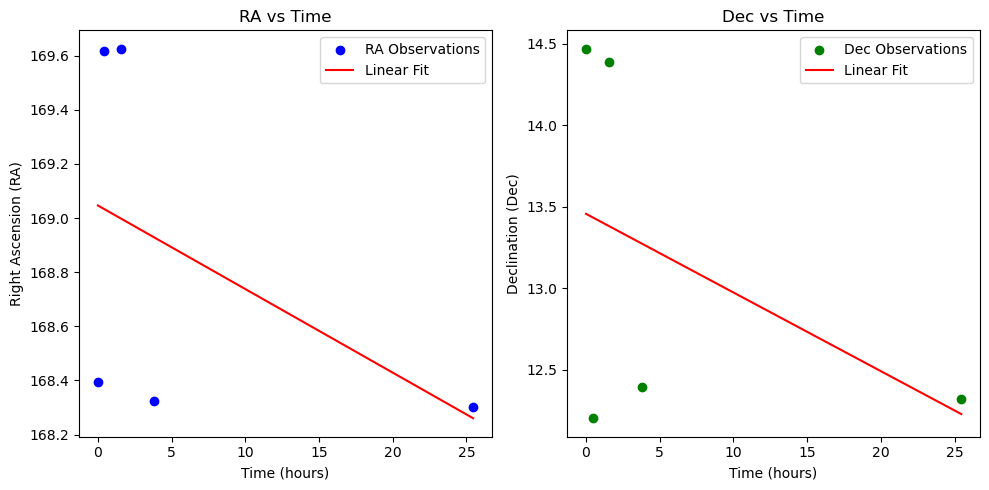

In [256]:
from datetime import datetime
from sklearn.linear_model import LinearRegression

# Ensure consistent lengths between time_list, ra_list, and dec_list
if len(time_list) > len(ra_list):
    time_list = time_list[:len(ra_list)]

# Convert observation times to datetime objects, handling fractional seconds
time_list_dt = [datetime.strptime(t, "%Y-%m-%dT%H:%M:%S.%f") for t in time_list]

# Calculate time differences in hours relative to the first observation
time_deltas = [(t - time_list_dt[0]).total_seconds() / 3600.0 for t in time_list_dt]

# Convert to NumPy arrays for fitting
time_deltas_np = np.array(time_deltas).reshape(-1, 1)
ra_np = np.array(ra_list).reshape(-1, 1)
dec_np = np.array(dec_list).reshape(-1, 1)

# Fit a linear model to the asteroid's motion (RA and Dec vs time)
ra_model = LinearRegression().fit(time_deltas_np, ra_np)
dec_model = LinearRegression().fit(time_deltas_np, dec_np)

# Predict the asteroid's position one hour beyond the last observation
last_time = time_deltas[-1]
future_time = last_time + 1  # One hour beyond the last observation
predicted_ra = ra_model.predict([[future_time]])[0][0]
predicted_dec = dec_model.predict([[future_time]])[0][0]

# Display results
print(f"Predicted RA: {predicted_ra:.6f}, Predicted Dec: {predicted_dec:.6f} (one hour beyond last observation)")

# Plot RA and Dec vs time with the fitted linear models
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(time_deltas, ra_list, color='blue', label='RA Observations')
plt.plot(time_deltas, ra_model.predict(time_deltas_np), color='red', label='Linear Fit')
plt.xlabel("Time (hours)")
plt.ylabel("Right Ascension (RA)")
plt.title("RA vs Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(time_deltas, dec_list, color='green', label='Dec Observations')
plt.plot(time_deltas, dec_model.predict(time_deltas_np), color='red', label='Linear Fit')
plt.xlabel("Time (hours)")
plt.ylabel("Declination (Dec)")
plt.title("Dec vs Time")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Discuss limitations of using a linear model
print("""
Limitations of Using a Linear Model:
1. A linear model assumes uniform motion, which may not be accurate for objects influenced by gravitational forces.
2. The asteroid's trajectory is likely curved due to orbital mechanics, making a linear fit unsuitable for long-term predictions.
3. Additional data points over a longer observation period would allow for fitting a more complex model (e.g., polynomial or orbital model).
4. Incorporating external data, such as the asteroid's orbital parameters, would improve prediction accuracy.
""")


Limitations of Using a Linear Model:
1. A linear model assumes uniform motion, which may not be accurate for objects influenced by gravitational forces.
2. The asteroid's trajectory is likely curved due to orbital mechanics, making a linear fit unsuitable for long-term predictions.
3. Additional data points over a longer observation period would allow for fitting a more complex model (e.g., polynomial or orbital model).
4. Incorporating external data, such as the asteroid's orbital parameters, would improve prediction accuracy.



# A Note on the Project as a Whole

The main issue arising from this project is the inability to properly identify the asteroid based on its movement, my code compares the WCS of all the bright objects of two adjacent frames and highlights the object that moved the most (had the greatest difference in coordinate space between the two frames). 

## 5. Tools and Libraries (6 points)

You are encouraged to use:
- **Astropy** for handling FITS files, WCS coordinates, and metadata.
- **skimage** for any image processing tasks like filtering or alignment.
- **Matplotlib / Seaborn** for plotting motion and displacement.
- **NumPy / SciPy** for numerical calculations and fitting linear models.

Proper use of tools and libraries will be evaluated on:
- Correct use of relevant packages for the task.
- Efficient coding practices.
- Use of appropriate data structures and functions.

## 6. Submission Instructions (8 points)

- Submit your completed notebook (.ipynb) and any additional files.
- Submit into the **`2025/Final/YourGitHubUserName`** folder in the repository.
- Deadline: During finals week.

### Submission Quality Guidelines:
- Use **docstrings** for all functions.
- Write **clear and readable code**.
- Include **comments** explaining non-obvious steps.
- Organize notebook with **markdown cells** explaining each section.
- Ensure that all **code runs without errors**.
- Use **figures and visualizations** where appropriate.

## 7. Grading Breakdown
- **Tasks Total:** 28 pts
- **Tools Use:** 6 pts
- **Submission Quality:** 8 pts
- **Total:** **42 Points**